# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [19]:
#Import all the necessary modules


# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
diab_df = pd.read_csv("diabetes.csv")



It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [21]:
diab_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [22]:
diab_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [29]:
diab_df['Glucose']=diab_df['Glucose'].replace(0,diab_df['Glucose'].median())
diab_df['BloodPressure']=diab_df['BloodPressure'].replace(0,diab_df['BloodPressure'].median())
diab_df['Insulin']=diab_df['Insulin'].replace(0,diab_df['Insulin'].median())
diab_df['DiabetesPedigreeFunction']=diab_df['DiabetesPedigreeFunction'].replace(0,diab_df['DiabetesPedigreeFunction'].median())
diab_df['SkinThickness']=diab_df['SkinThickness'].replace(0,diab_df['SkinThickness'].median())
diab_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,0.0,0.232,54,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [12]:
diab_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

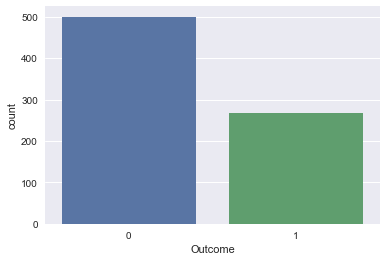

In [31]:
sns.countplot(x="Outcome",data= diab_df)

In [55]:
diab_df.groupby(["Outcome"]).count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

In [34]:
diab_df.describe()
#diab_df.median()
# in glucose variable has mean of 121, min= 44, max = 199. hence, variable distribution is normal.  
# in Blood pressure variable had mean of 72, min= 24, max = 122. hence, variable distribution is normal coz min and median are same


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


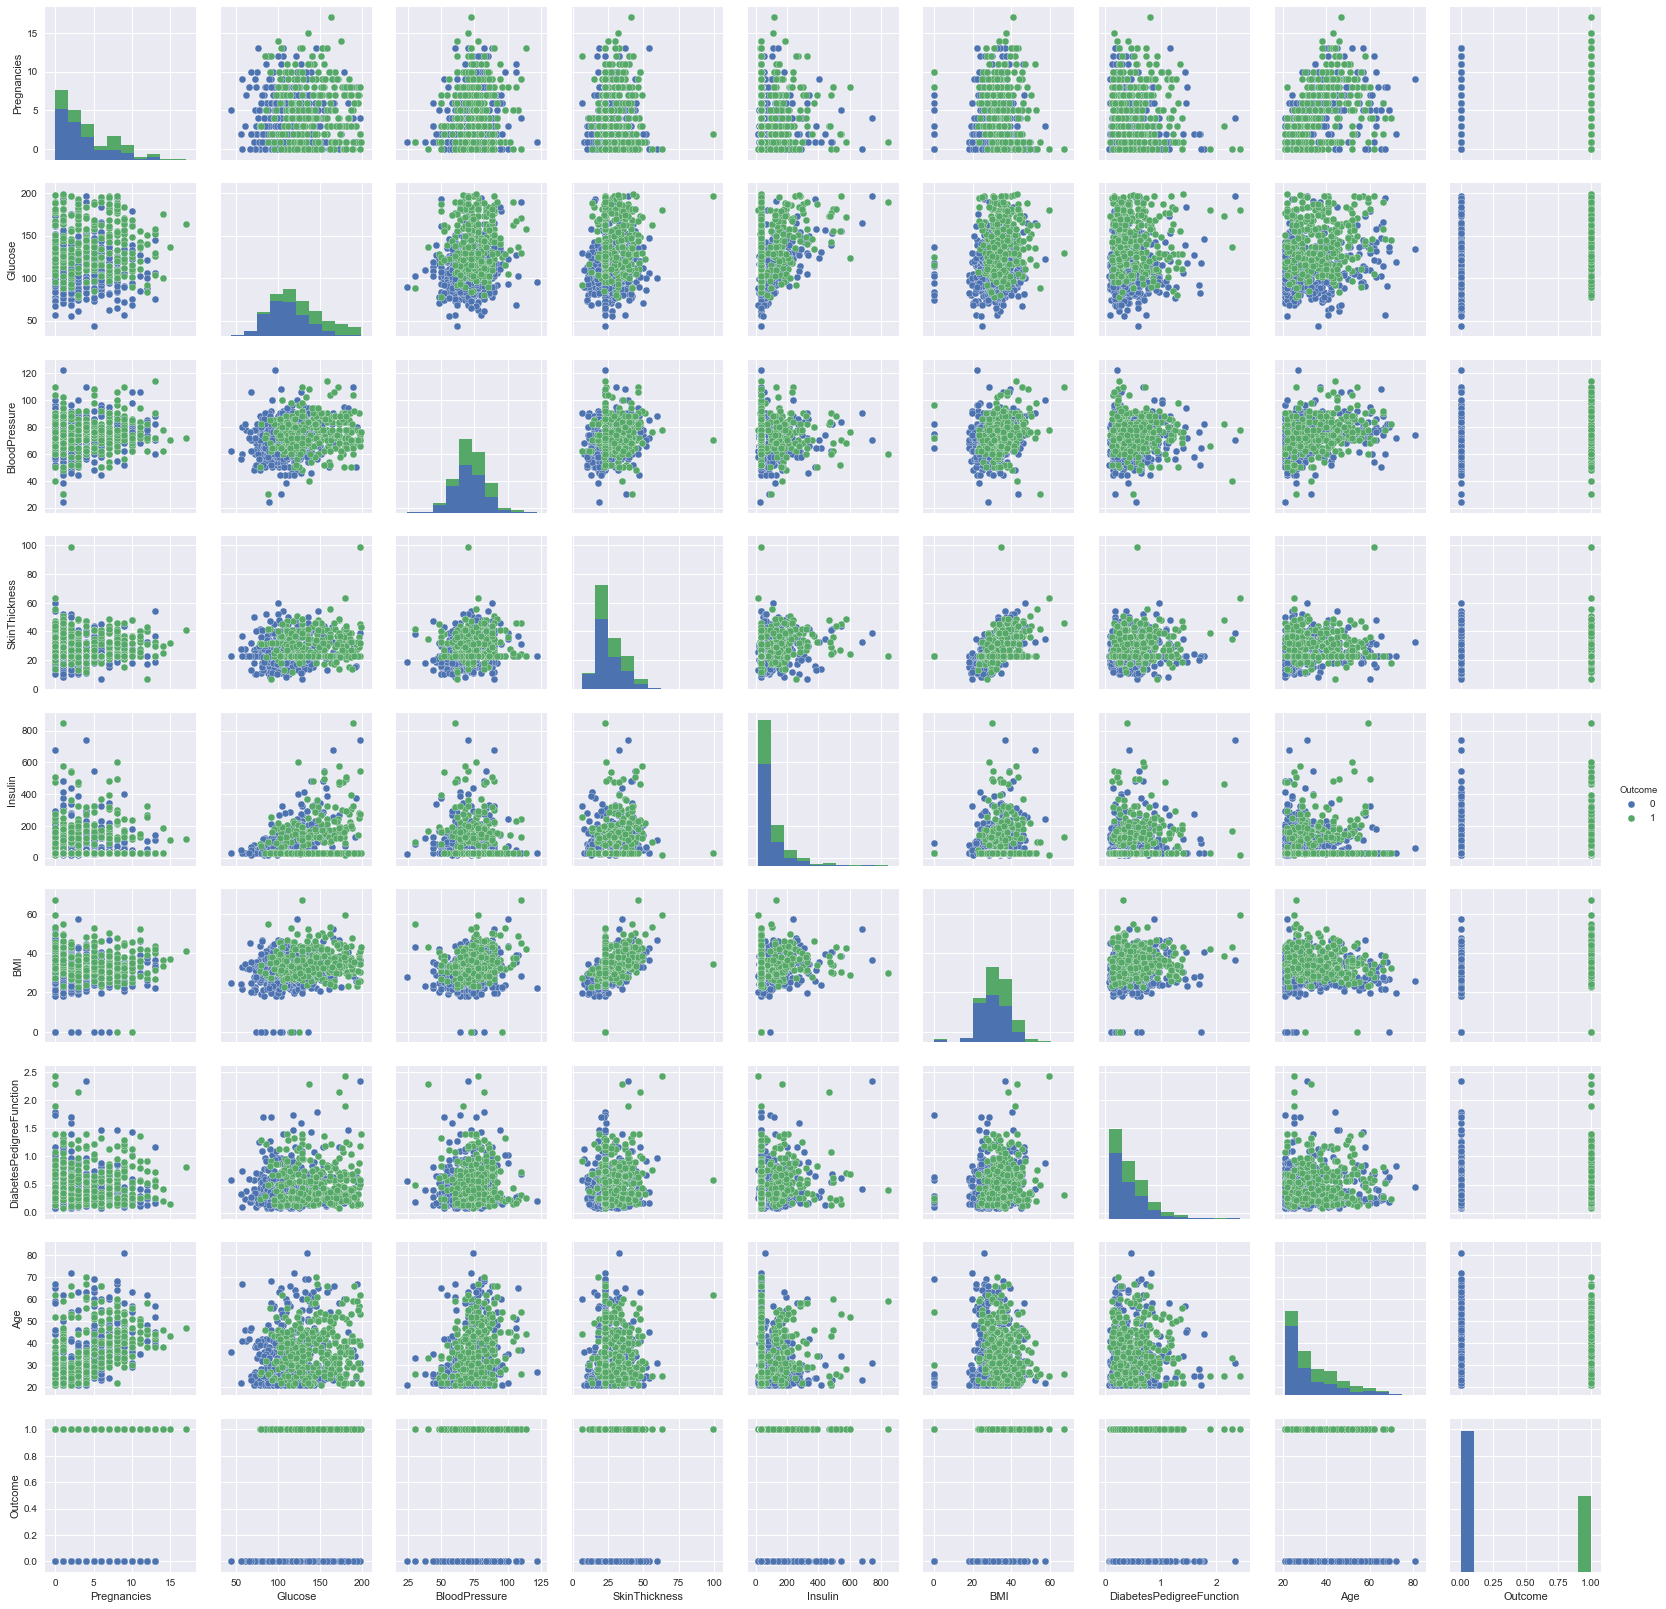

In [37]:

sns.pairplot(diab_df, hue='Outcome')


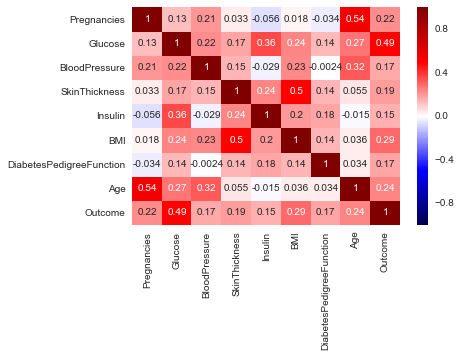

In [38]:
sns.heatmap(diab_df.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')
## pair plot doesn't give good understanding of correlation among variables.
## pregnancy and age shows high correlated.
## glucose and pregnancy shows high correlated.
## BMI and skin thichkness shows high correlation.
## glucose and skin thickness shows high correlation.
##However, Glucose is the variable that stands out that impacts dependent variable.

Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [62]:
X = diab_df.iloc[:,0:-1].values
y = diab_df.iloc[:,8].values
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [65]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [78]:
y_predict = dt_model.predict(X_test)
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_predict))
dt_model.score(X_test , y_test)

[[122  35]
 [ 35  39]]


0.69696969696969702

Print the feature importance of the decision model - Optional

In [89]:

Z= pd.DataFrame(data=X,columns= ['Pregnancies', 'Glucose','BloodPressure','SkinThickness','BMI','Insulin','DiabetesPedigreeFunction','Age'])
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = Z.columns))


                               Imp
Pregnancies               0.080243
Glucose                   0.279379
BloodPressure             0.039245
SkinThickness             0.034280
BMI                       0.047688
Insulin                   0.219771
DiabetesPedigreeFunction  0.118012
Age                       0.181381


# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [79]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 85)
rfcl = rfcl.fit(X_train, y_train)


In [81]:
rfcl.score(X_test , y_test)

0.78787878787878785

# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [76]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=10)
#abcl = AdaBoostClassifier( n_estimators=50)
abcl = abcl.fit(X_train, y_train)

In [82]:
abcl.score(X_test , y_test)

0.73160173160173159

# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [83]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50)

#bgcl = BaggingClassifier(n_estimators=50)
bgcl = bgcl.fit(X_train, y_train)
bgcl.score(X_test , y_test)

0.78354978354978355

# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(X_train, y_train)
gbcl.score(X_test , y_test)

0.78787878787878785

# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.